In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import os
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_excel("data/NLP_TA_data.xlsx").set_index("Date")
data.head(5)

,Open,High,Low,Close,Volume,RSI,EMA34_Fast,EMA89_Medium,EMA200_Slow,Target,...,90,91,92,93,94,95,96,97,98,99
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-17,142.836842,143.086418,142.616064,143.067215,13138200,69.368667,140.046805,137.166343,130.880524,-0.316777,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2017-10-18,143.211186,143.230389,142.683225,142.894409,17218200,67.712070,140.209525,137.293633,131.000066,0.307168,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2017-10-19,142.059287,142.385658,141.368140,142.366455,27680300,62.802624,140.332778,137.406363,131.113164,-0.191982,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2017-10-20,142.942409,143.067190,142.577633,142.750427,30173300,64.791816,140.470930,137.525120,131.228958,-1.228703,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2017-10-23,143.048023,143.057617,141.617730,141.819321,29297100,56.887821,140.547981,137.620546,131.334334,-0.038391,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077


##### TRAIN DATE: START -> 2022-06-30
##### VAL DATE: 2022-07-01 -> 2023-02-21
##### TEST DATE: 2023-02-22 -> END 

In [3]:
train_data = data.loc[:"2022-06-30"]
train_data

,Open,High,Low,Close,Volume,RSI,EMA34_Fast,EMA89_Medium,EMA200_Slow,Target,...,90,91,92,93,94,95,96,97,98,99
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-17,142.836842,143.086418,142.616064,143.067215,13138200,69.368667,140.046805,137.166343,130.880524,-0.316777,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2017-10-18,143.211186,143.230389,142.683225,142.894409,17218200,67.712070,140.209525,137.293633,131.000066,0.307168,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2017-10-19,142.059287,142.385658,141.368140,142.366455,27680300,62.802624,140.332778,137.406363,131.113164,-0.191982,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2017-10-20,142.942409,143.067190,142.577633,142.750427,30173300,64.791816,140.470930,137.525120,131.228958,-1.228703,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2017-10-23,143.048023,143.057617,141.617730,141.819321,29297100,56.887821,140.547981,137.620546,131.334334,-0.038391,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,285.290061,292.527924,285.052114,292.101562,58422300,50.077066,294.387181,315.945150,332.347639,-3.519761,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2022-06-27,293.479692,294.054740,288.809804,289.959930,54151500,48.833566,294.134195,315.367701,331.925871,-9.379445,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2022-06-28,290.505269,293.132700,280.937439,281.125824,61609800,44.004281,293.390860,314.606770,331.420398,0.396588,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077


In [4]:
validate_data = data.loc["2022-07-01": "2023-02-21"]
validate_data

,Open,High,Low,Close,Volume,RSI,EMA34_Fast,EMA89_Medium,EMA200_Slow,Target,...,90,91,92,93,94,95,96,97,98,99
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-01,276.574927,280.124432,274.671261,279.727844,56675100,43.644381,291.165203,312.328119,329.890718,8.576343,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2022-07-05,275.940319,284.635636,274.393604,284.516663,61829300,47.124983,290.785286,311.710086,329.439235,1.437636,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2022-07-06,284.903368,288.472721,283.158343,286.341003,63194700,48.425140,290.531327,311.146329,329.010397,5.304454,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2022-07-07,287.163991,293.182316,287.163991,292.468445,56620100,52.617866,290.642020,310.731265,328.646796,3.242177,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2022-07-08,289.593119,294.223371,288.641301,292.835297,59895500,52.863670,290.767350,310.333577,328.290462,-3.807301,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-14,301.571008,306.379962,299.599620,305.414185,64079100,62.025201,290.197700,285.357432,294.296447,4.181722,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2023-02-15,303.572245,307.923210,302.875311,307.753967,43100600,63.530866,291.200916,285.855133,294.430353,-1.075314,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2023-02-16,303.054532,307.086883,301.829877,301.979218,59498600,57.501987,291.816819,286.213446,294.505466,0.089604,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077


In [5]:
test_data = data.loc["2023-02-22":]
test_data

,Open,High,Low,Close,Volume,RSI,EMA34_Fast,EMA89_Medium,EMA200_Slow,Target,...,90,91,92,93,94,95,96,97,98,99
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-22,293.337012,295.069425,291.285985,292.968628,51389200,49.278585,292.340893,286.795266,294.524989,-1.144986,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2023-02-23,296.672452,296.831759,291.276041,295.527466,69294400,51.561297,292.522983,286.989315,294.534963,0.089604,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2023-02-24,290.489497,291.694219,288.786922,290.579102,74332000,47.163383,292.411904,287.069088,294.495602,-1.125084,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2023-02-27,293.785057,295.198856,292.062580,292.659973,48995000,49.118747,292.426079,287.193330,294.477337,0.258877,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2023-02-28,292.022739,294.830466,291.684223,292.281616,48243100,48.767154,292.417824,287.306403,294.455489,-2.051027,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10,366.899994,371.279999,366.390015,368.589996,46968800,54.872710,364.818930,359.988562,342.497528,1.279999,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2023-10-11,369.940002,371.410004,368.190002,371.220001,38215100,57.500651,365.184705,360.238149,342.783324,-1.800018,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
2023-10-12,371.730011,373.739990,367.500000,369.929993,49587900,55.793167,365.455865,360.453524,343.053440,-5.290009,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077


In [6]:
scaler1 = MinMaxScaler(feature_range=(0,1))
train_data.iloc[:,:10] = scaler1.fit_transform(train_data.iloc[:,:10])
validate_data.iloc[:,:10] = scaler1.transform(validate_data.iloc[:,:10])
test_data.iloc[:,:10] = scaler1.transform(test_data.iloc[:,:10])

c:\Users\84866\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\Users\84866\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\Users\84866\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py

In [7]:
# scaler2 = MinMaxScaler(feature_range=(0,1))
# train_data_scaled = scaler2.fit_transform(train_data.iloc[:,12:])
# validate_data_scaled = scaler2.transform(validate_data.iloc[:,12:])
# test_data_scaled = scaler2.transform(test_data.iloc[:,12:])

In [8]:
n_components = 20
pca = PCA(n_components=n_components)
train_data_scaled = pca.fit_transform(train_data.iloc[:, 12:])
validate_data_scaled = pca.transform(validate_data.iloc[:, 12:])
test_data_scaled = pca.transform(test_data.iloc[:, 12:])

In [9]:
# explained_variance = pca.explained_variance_ratio_
# plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance')
# plt.title('Scree Plot')
# plt.show()

In [10]:
# cumulative_explained_variance = np.cumsum(explained_variance)
# plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Cumulative Explained Variance')
# plt.show()

In [11]:
train = np.concatenate([train_data[["Open", "High", "Low", "Close", "Volume", "RSI","EMA34_Fast","EMA89_Medium","EMA200_Slow"
]].values, train_data_scaled], axis=1)
validate = np.concatenate([validate_data[["Open", "High", "Low", "Close", "Volume", "RSI","EMA34_Fast","EMA89_Medium","EMA200_Slow"
]].values, validate_data_scaled], axis=1)
test = np.concatenate([test_data[["Open", "High", "Low", "Close", "Volume", "RSI","EMA34_Fast","EMA89_Medium","EMA200_Slow"
]].values, test_data_scaled], axis=1)

In [12]:
train_data = pd.DataFrame(train)
train_data = train_data.rename(columns=dict(zip(train_data.columns[:9], ["Open", "High", "Low", "Close", "Volume", "RSI","EMA34_Fast","EMA89_Medium","EMA200_Slow"
])))
validate_data = pd.DataFrame(validate)
validate_data = validate_data.rename(columns=dict(zip(validate_data.columns[:9], ["Open", "High", "Low", "Close", "Volume", "RSI","EMA34_Fast","EMA89_Medium","EMA200_Slow"
])))
test_data = pd.DataFrame(test)
test_data = test_data.rename(columns=dict(zip(test_data.columns[:9], ["Open", "High", "Low", "Close", "Volume", "RSI","EMA34_Fast","EMA89_Medium","EMA200_Slow"
])))

In [13]:
def set_seed(seed: int = 42) -> None:
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)
  tf.experimental.numpy.random.seed(seed)
  # Set a fixed value for the hash seed
  os.environ["PYTHONHASHSEED"] = str(seed)
  print(f"Random seed set as {seed}")

In [14]:
set_seed(0)

Random seed set as 0


In [15]:
# train.to_excel("data/final_data/train.xlsx")
# validate.to_excel("data/final_data/validate.xlsx")
# test.to_excel("data/final_data/test.xlsx")

In [16]:
# train_data = pd.read_excel("data/final_data/train.xlsx").iloc[:, 1:]
# train_data.head(10)

In [17]:
# validate_data = pd.read_excel("data/final_data/validate.xlsx").iloc[:, 1:]
# validate_data.head(5)

In [18]:
# test_data = pd.read_excel("data/final_data/test.xlsx").iloc[:, 1:]
# test_data.head(5)

In [19]:
def split_sequence(X_data, y_data,n_steps):
    X, y = list(), list()
    for i in range (len(y_data)):
        end_ix = i + n_steps
        if end_ix > len(y_data) - 1:
            break
        seq_x, seq_y = X_data[i:end_ix, :], y_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [20]:
features = 5
n_days = 20

X_train_ohlcv, y_train = split_sequence(np.array(train_data[["Open", "High", "Low", "Close", "Volume"]]), train_data["Close"], n_days)
print(X_train_ohlcv.shape, y_train.shape)

X_train_embbeded, y_train = split_sequence(np.array(train_data.drop(columns=["Open", "High", "Low", "Close", "Volume"])), train_data["Close"], n_days)
print(X_train_embbeded.shape, y_train.shape)

(1164, 20, 5) (1164,)
(1164, 20, 24) (1164,)


In [21]:
X_validate_ohlcv, y_validate = split_sequence(np.array(validate_data[["Open", "High", "Low", "Close", "Volume"]]), validate_data["Close"], n_days)
X_validate_ohlcv.shape, y_validate.shape

X_validate_embbeded, y_validate = split_sequence(np.array(validate_data.drop(columns=["Open", "High", "Low", "Close", "Volume"])), validate_data["Close"], n_days)
X_validate_embbeded.shape, y_validate.shape

((141, 20, 24), (141,))

In [22]:
X_test_ohlcv, y_test = split_sequence(np.array(test_data[["Open", "High", "Low", "Close", "Volume"]]), test_data["Close"], n_days)
X_test_ohlcv.shape, y_test.shape

X_test_embbeded, y_test = split_sequence(np.array(test_data.drop(columns=["Open", "High", "Low", "Close", "Volume"])), test_data["Close"], n_days)
X_test_embbeded.shape, y_test.shape

((144, 20, 24), (144,))

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
# Define the shapes of your input data
shape_1 = (X_train_ohlcv.shape[1], X_train_ohlcv.shape[2])  # Shape of the first input
shape_2 = (X_train_embbeded.shape[1], X_train_embbeded.shape[2])  # Shape of the second input

# Define the input layers
input_1 = Input(shape=shape_1)
input_2 = Input(shape=shape_2)

# Define the RNN layers for each input
rnn_1 = LSTM(100)(input_1)
rnn_2 = LSTM(4)(input_2)

# Merge the outputs of the RNN layers
merged = tf.keras.layers.concatenate([rnn_1, rnn_2])

# Add additional layers for further processing
dense1 = Dense(2, activation='relu')(merged)
output = Dense(1, activation='linear')(merged)

# Create the model
model = Model(inputs=[input_1, input_2], outputs=output)
optimizer = SGD(lr=1e-3, momentum=0.9,decay=1e-2/500)
# Compile the model
model.compile(optimizer = 'RMSprop', loss='MSE')

# Print a summary of the model architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20, 5)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 20, 24)]     0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 100)          42400       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (None, 4)            464         ['input_2[0][0]']                
                                                                                              

c:\Users\84866\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [24]:
y_train = np.atleast_2d(y_train).T
y_train.shape

(1164, 1)

In [25]:
# Train the model
history = model.fit([X_train_ohlcv, X_train_embbeded], y_train, epochs=200, batch_size=40, validation_data=([X_validate_ohlcv, X_validate_embbeded], y_validate))

Epoch 1/200


30/30 [==============================] - 8s 59ms/step - loss: 0.0128 - val_loss: 0.0037
Epoch 2/200
30/30 [==============================] - 0s 17ms/step - loss: 0.0055 - val_loss: 0.0076
Epoch 3/200
30/30 [==============================] - 0s 13ms/step - loss: 0.0034 - val_loss: 0.0077
Epoch 4/200
30/30 [==============================] - 0s 14ms/step - loss: 0.0023 - val_loss: 0.0109
Epoch 5/200
30/30 [==============================] - 0s 14ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 6/200
30/30 [==============================] - 0s 14ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 7/200
30/30 [==============================] - 0s 14ms/step - loss: 0.0012 - val_loss: 9.0132e-04
Epoch 8/200
30/30 [==============================] - 0s 13ms/step - loss: 8.5161e-04 - val_loss: 9.9617e-04
Epoch 9/200
30/30 [==============================] - 1s 17ms/step - loss: 8.4612e-04 - val_loss: 0.0014
Epoch 10/200
30/30 [==============================] - 0s 14ms/step - loss: 7.1668e-04 - val_loss

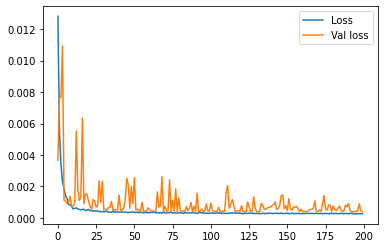

In [26]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val loss")

plt.legend()
plt.show()

In [27]:
y_pred = model.predict([X_test_ohlcv, X_test_embbeded])
# y_pred = scaler1.inverse_transform(y_pred)
# y_test = scaler1.inverse_transform(y_test)
r2_score(y_test, y_pred)

5/5 [==============================] - 1s 13ms/step


0.9722602602112552

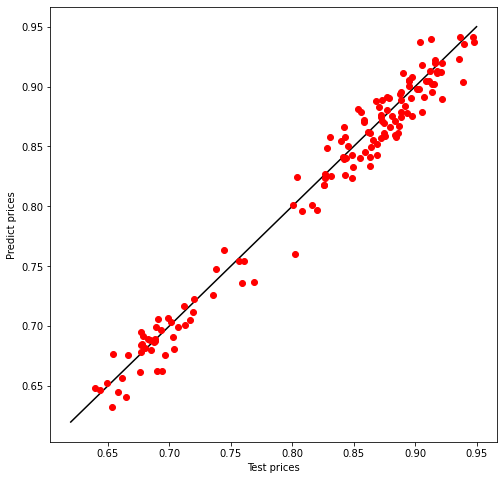

In [37]:
plt.figure(figsize=(8,8))
plt.plot([0.62,0.95], [0.62,0.95], 'k-')
plt.plot(y_test, y_pred, "ro")
plt.xlabel("Test prices")
plt.ylabel("Predict prices")
plt.show()

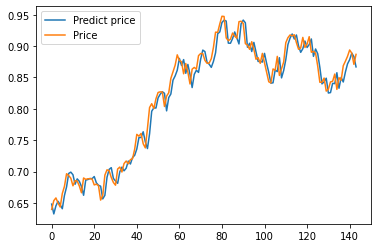

In [29]:
plt.plot(y_pred, label = "Predict price")
plt.plot(y_test, label = "Price")
plt.legend()
plt.show()